Testowanie parametrów DBSCAN:
eps=0.4, min_samples=3 -> Silhouette: 0.335
eps=0.4, min_samples=5 -> Silhouette: 0.278
eps=0.5, min_samples=3 -> Silhouette: 0.347
eps=0.5, min_samples=5 -> Silhouette: 0.486
eps=0.6, min_samples=3 -> Silhouette: 0.423
eps=0.6, min_samples=5 -> Silhouette: 0.538


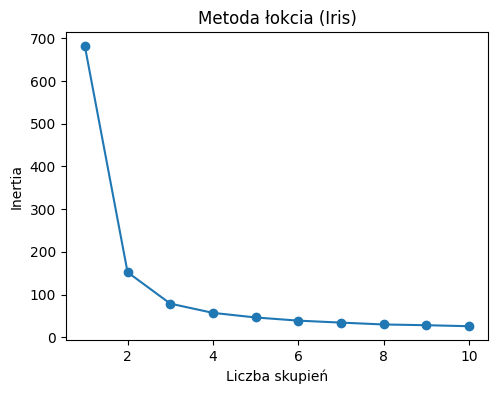

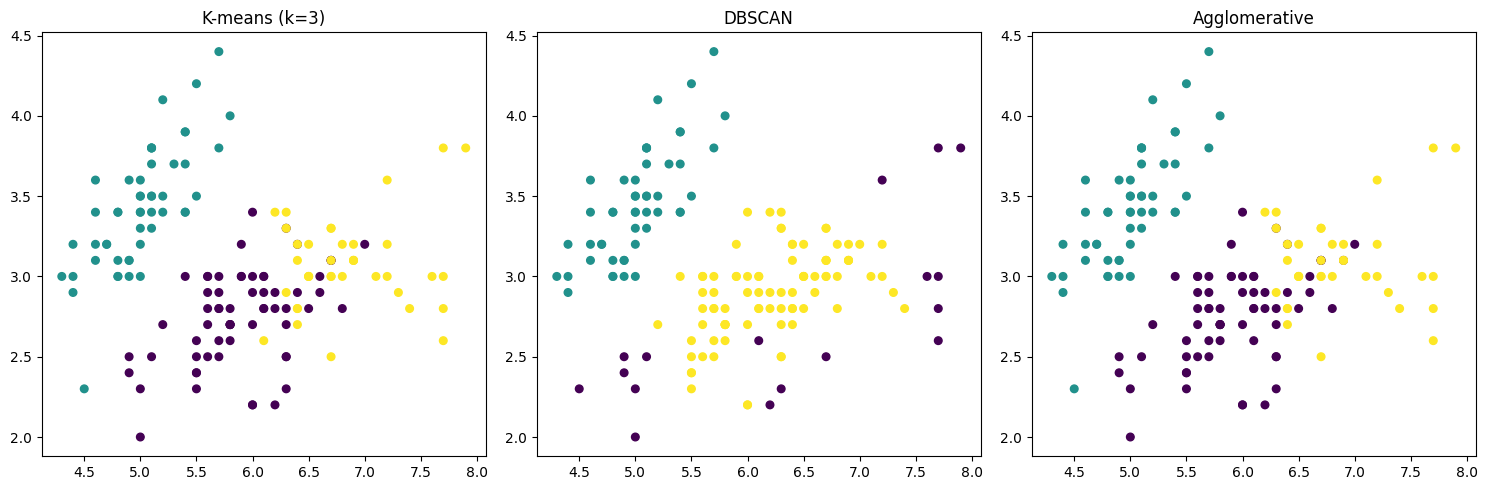


Porównanie numeryczne (Silhouette Score):
K-means: 0.553
DBSCAN: 0.486
Agglomerative: 0.554

Dodatkowe kryteria dla K-means (k=3):
Calinski-Harabasz: 561.63
Davies-Bouldin: 0.66


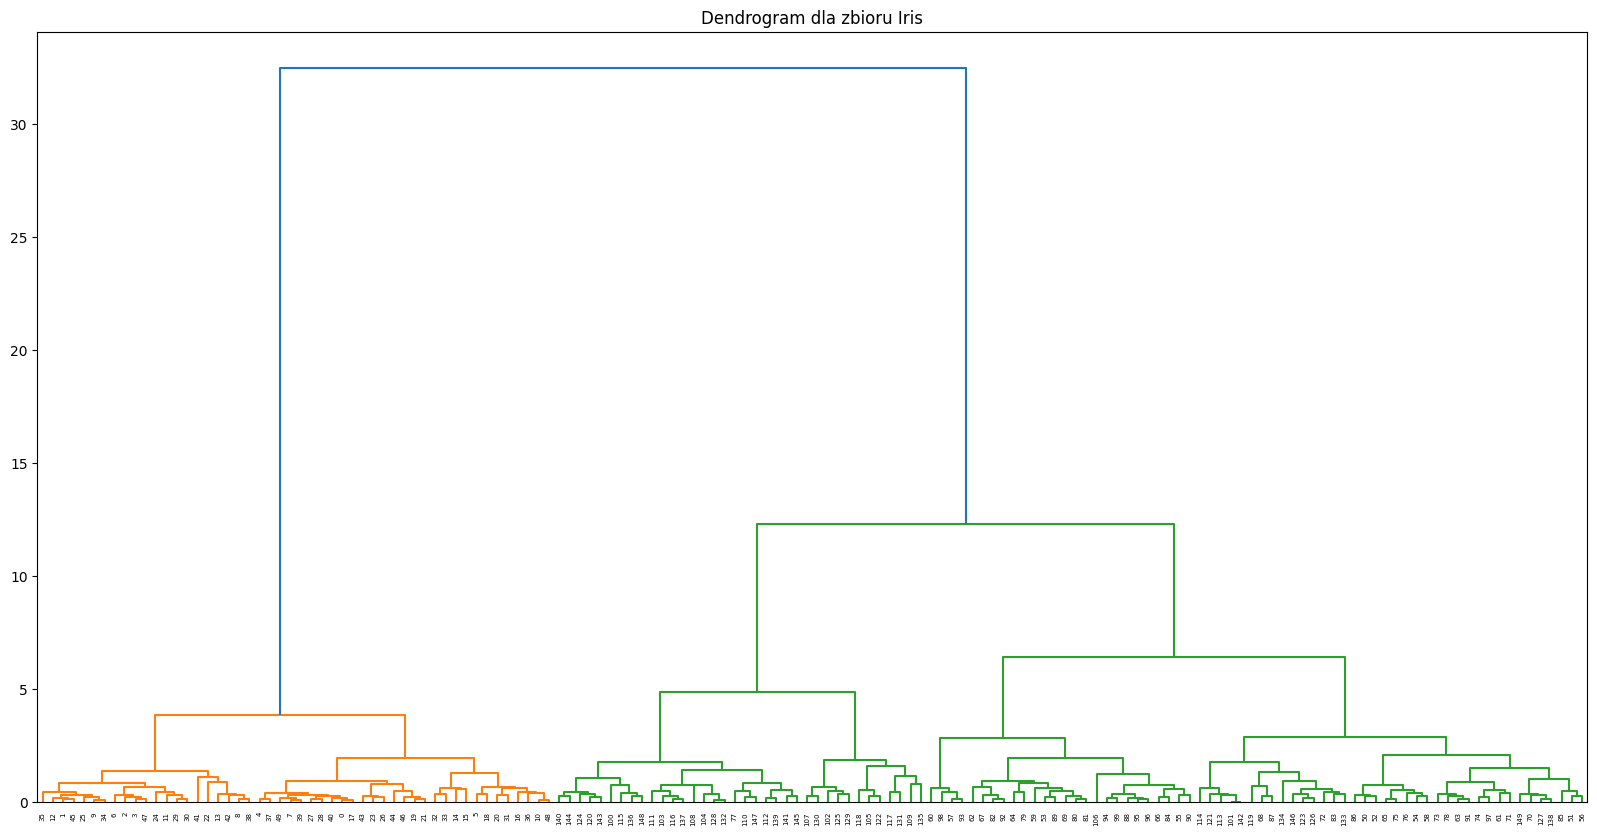

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

iris = load_iris()
X = iris.data  
y_true = iris.target

inertia = []
k_values = range(1, 11) 

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X) 
    inertia.append(kmeans.inertia_) 

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o') 
plt.title("Metoda łokcia (Iris)") 
plt.xlabel("Liczba skupień") 
plt.ylabel("Inertia") 


print("Testowanie parametrów DBSCAN:")
for eps in [0.4, 0.5, 0.6]:
    for ms in [3, 5]:
        db = DBSCAN(eps=eps, min_samples=ms) 
        labels = db.fit_predict(X) 
        if len(set(labels)) > 1:
            score = silhouette_score(X, labels) 
            print(f"eps={eps}, min_samples={ms} -> Silhouette: {score:.3f}")
        else:
            print(f"eps={eps}, min_samples={ms} -> Tylko 1 skupienie (brak wyniku)")


km = KMeans(n_clusters=3, random_state=0, n_init=10)
y_km = km.fit_predict(X)

db = DBSCAN(eps=0.5, min_samples=5)
y_db = db.fit_predict(X)

agg = AgglomerativeClustering(n_clusters=3) 
y_agg = agg.fit_predict(X) 

titles = ['K-means (k=3)', 'DBSCAN', 'Agglomerative']
results = [y_km, y_db, y_agg]

plt.figure(figsize=(15, 5))
for i, (res, title) in enumerate(zip(results, titles)):
    plt.subplot(1, 3, i+1)
    plt.scatter(X[:, 0], X[:, 1], c=res, cmap='viridis', s=30)
    plt.title(title)
plt.tight_layout()
plt.show()

print("\nPorównanie numeryczne (Silhouette Score):")
print(f"K-means: {silhouette_score(X, y_km):.3f}") 
print(f"DBSCAN: {silhouette_score(X, y_db):.3f}") 
print(f"Agglomerative: {silhouette_score(X, y_agg):.3f}")

print("\nDodatkowe kryteria dla K-means (k=3):")
print(f"Calinski-Harabasz: {calinski_harabasz_score(X, y_km):.2f}") 
print(f"Davies-Bouldin: {davies_bouldin_score(X, y_km):.2f}") 

linked = linkage(X, 'ward') 
plt.figure(figsize=(20, 10))
dendrogram(linked) 
plt.title("Dendrogram dla zbioru Iris") 
plt.show()